# 

# <center> ML/DL Regressor - Basic Examples

## Imports

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Data

In [2]:
# load data
url = "https://raw.githubusercontent.com/FernandoSartorGH/data/main/housing.csv"

df = pd.read_csv(url)

In [3]:
# Define X and y
X, y = df.drop(columns='target'), df.target

# Train test data
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Standard scaler for input features
train_scaler = MinMaxScaler().fit(X_train)

train_std = train_scaler.transform(X_train)
test_std = train_scaler.transform(X_test)  # Use the same scaler for test data

## View Data

In [5]:
df

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
# Check
df.isna().sum()

ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [7]:
# Check types
df.dtypes

ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [8]:
# Check Uniques
df.nunique()

ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
target     229
dtype: int64

---

# Base Line

## Linear Regression

In [9]:
# Imports
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [10]:
# Define model
lr = LinearRegression()

# Fit Model
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Accuracy
r2 = r2_score(y_test, y_pred)
print(f'r2: {round(r2*100, 2)}%')

r2: 75.68%


In [11]:
data = {'y_test': y_test, 'y_pred':y_pred}
pd.DataFrame(data)

,y_test,y_pred
64,33.0,21.665078
100,27.5,23.860923
400,5.6,13.650258
485,21.2,21.636727
454,14.9,13.640682
...,...,...
350,22.9,19.598343
191,30.5,30.002105
239,23.3,28.067261
109,19.4,19.374386


## Knn

In [12]:
# Imports
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [13]:
# Define model
knn = KNeighborsRegressor()

# Fit model
knn.fit(train_std, y_train)

# Predictions
y_pred = knn.predict(test_std)

# Accuracy
r2 = r2_score(y_test, y_pred)
print(f'r2: {round(r2*100, 2)}%')

r2: 72.25%


In [14]:
data = {'y_test': y_test, 'y_pred':y_pred}
pd.DataFrame(data)

,y_test,y_pred
64,33.0,26.98
100,27.5,21.22
400,5.6,11.94
485,21.2,20.90
454,14.9,12.32
...,...,...
350,22.9,24.00
191,30.5,33.20
239,23.3,22.80
109,19.4,19.82


## Decision Tree

In [15]:
# Imports
from sklearn.tree import DecisionTreeRegressor

In [16]:
# Define the model
dt = DecisionTreeRegressor()

# Fit the model
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Accuracy
r2 = r2_score(y_test, y_pred)
print(f'r2: {round(r2*100, 2)}%')

r2: 77.7%


In [17]:
data = {'y_test': y_test, 'y_pred':y_pred}
pd.DataFrame(data)

,y_test,y_pred
64,33.0,29.8
100,27.5,28.7
400,5.6,9.7
485,21.2,21.4
454,14.9,12.7
...,...,...
350,22.9,21.9
191,30.5,28.6
239,23.3,29.4
109,19.4,16.1


---

# Machine Learning Models

## Random Forest

In [18]:
# Imports
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Define the model
rf = RandomForestRegressor(n_estimators = 100, random_state = 123)

# Fit the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
r2 = r2_score(y_test, y_pred)
print(f'r2: {round(r2*100, 2)}%')

r2: 91.7%


In [20]:
data = {'y_test': y_test, 'y_pred':y_pred}
pd.DataFrame(data)

,y_test,y_pred
64,33.0,31.154
100,27.5,25.144
400,5.6,9.692
485,21.2,21.533
454,14.9,13.784
...,...,...
350,22.9,23.298
191,30.5,28.874
239,23.3,26.118
109,19.4,18.547


## Extra Trees

In [21]:
# Imports
from sklearn.ensemble import ExtraTreesRegressor

In [22]:
# Define the model
et = ExtraTreesRegressor(n_estimators = 100, random_state = 123)

# Fit the model
et.fit(X_train, y_train)

# Predictions
y_pred = et.predict(X_test)

# Accuracy
r2 = r2_score(y_test, y_pred)
print(f'r2: {round(r2*100, 2)}%')

r2: 92.16%


In [23]:
data = {'y_test': y_test, 'y_pred':y_pred}
pd.DataFrame(data)

,y_test,y_pred
64,33.0,31.715
100,27.5,24.196
400,5.6,9.495
485,21.2,22.014
454,14.9,13.400
...,...,...
350,22.9,23.812
191,30.5,30.521
239,23.3,24.776
109,19.4,19.289


## ADA Boosting

In [24]:
from sklearn.ensemble import AdaBoostRegressor

In [25]:
# Define the model
ada = AdaBoostRegressor(n_estimators = 100, random_state = 123)

# Fit the model
ada.fit(X_train, y_train)

# Predictions
y_pred = ada.predict(X_test)

# Accuracy
r2 = r2_score(y_test, y_pred)
print(f'r2: {round(r2*100, 2)}%')

r2: 87.28%


In [26]:
data = {'y_test': y_test, 'y_pred':y_pred}
pd.DataFrame(data)

,y_test,y_pred
64,33.0,29.800000
100,27.5,22.082911
400,5.6,11.897980
485,21.2,21.425547
454,14.9,17.541270
...,...,...
350,22.9,24.766000
191,30.5,28.677358
239,23.3,26.233962
109,19.4,18.576119


## Grad Boosting

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
# Define the model
grd = GradientBoostingRegressor(n_estimators = 100, random_state = 123)

# Fit the model
grd.fit(X_train, y_train)

# Predictions
y_pred = grd.predict(X_test)

# Accuracy
r2 = r2_score(y_test, y_pred)
print(f'r2: {round(r2*100, 2)}%')

r2: 91.53%


In [29]:
data = {'y_test': y_test, 'y_pred':y_pred}
pd.DataFrame(data)

,y_test,y_pred
64,33.0,30.696666
100,27.5,22.958628
400,5.6,10.559541
485,21.2,21.294987
454,14.9,13.349041
...,...,...
350,22.9,20.905030
191,30.5,27.991875
239,23.3,26.685194
109,19.4,18.644431


## SVM

In [30]:
# Imports
from sklearn.svm import SVR

In [31]:
# Define the model
svm = SVR()

# Fit the model
svm.fit(train_std, y_train)

# Predictions
y_pred = svm.predict(test_std)

# Accuracy
r2 = r2_score(y_test, y_pred)
print(f'r2: {round(r2*100, 2)}%')

r2: 61.92%


In [32]:
data = {'y_test': y_test, 'y_pred':y_pred}
pd.DataFrame(data)

,y_test,y_pred
64,33.0,22.942709
100,27.5,21.867294
400,5.6,13.416227
485,21.2,21.535912
454,14.9,13.201620
...,...,...
350,22.9,22.033003
191,30.5,28.257942
239,23.3,26.541124
109,19.4,18.312584


---

# Deep Learnig Models

## Pytorch

In [33]:
# Pytorch
import torch
from torch import nn
import torch.optim as optim

In [34]:
# Define devicce
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [35]:
# load data
url = "https://raw.githubusercontent.com/FernandoSartorGH/data/main/housing.csv"

df = pd.read_csv(url)

# Define X and y
X, y = df.drop(columns='target'), df.target

# Train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [36]:
# Standard scaler for input features
train_scaler = MinMaxScaler().fit(X_train)
train_std = train_scaler.transform(X_train)
test_std = train_scaler.transform(X_test)  # Use the same scaler for test data

X_train_std = torch.tensor(train_std, dtype=torch.float32).to(device)
X_test_std = torch.tensor(test_std, dtype=torch.float32).to(device)

# Convert the target variable into tensors
y_train = torch.tensor(y_train.values, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.values, dtype=torch.float32).to(device)

In [37]:
# Parameters
in_size = X_train.shape[1]
hidden_size = 10
out_size = 1 

# Define model
model = nn.Sequential(
    nn.Linear(in_features=in_size, out_features=hidden_size),
    nn.ReLU(),
    nn.Linear(in_features=hidden_size, out_features=hidden_size),
    nn.ReLU(),
    nn.Linear(in_features=hidden_size, out_features = 1)
)

# Move model and data to GPU
model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [38]:
# Train the model
num_epochs = 1000
train_loss = []
test_loss = []
train_r2 = []
test_r2 = []

for epoch in range(num_epochs):
    # Forward
    y_pred = model(X_train_std)
    loss = criterion(y_pred, y_train.unsqueeze(1))
    
    # Calculate R² for training data
    train_r2.append(r2_score(y_train.numpy(), y_pred.detach().numpy()))

    # Backward and Optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    # Testing
    with torch.no_grad():
        y_pred = model(X_test_std)
        loss = criterion(y_pred, y_test.unsqueeze(1))
        test_loss.append(loss.item())
        
        # Calculate R² for test data
        test_r2.append(r2_score(y_test.numpy(), y_pred.detach().numpy()))

    if epoch % 50 == 0:
        pass #print(f"Epoch: {epoch}, Train Loss: {train_loss[-1]}, Test Loss: {test_loss[-1]}")

# Evaluate the model on the test set
with torch.no_grad():
    y_pred = model(X_test_std)
    mse = criterion(y_pred, y_test)
    r2 = r2_score(y_test.numpy(), y_pred.detach().numpy())
    print(f"Mean Squared Error (MSE) on Test Set: {mse:.4f}")
    print(f"r2 score on Test Set: {r2:.4f}")

Mean Squared Error (MSE) on Test Set: 135.7856
r2 score on Test Set: 0.4311


In [39]:
data = {'y_test': y_test, 'y_pred':y_pred.reshape(-1)}
pd.DataFrame(data)

,y_test,y_pred
0,33.000000,29.667627
1,27.500000,23.399529
2,5.600000,16.649130
3,21.200001,19.324448
4,14.900000,12.553589
...,...,...
97,22.900000,30.047880
98,30.500000,28.683832
99,23.299999,26.921761
100,19.400000,21.488989


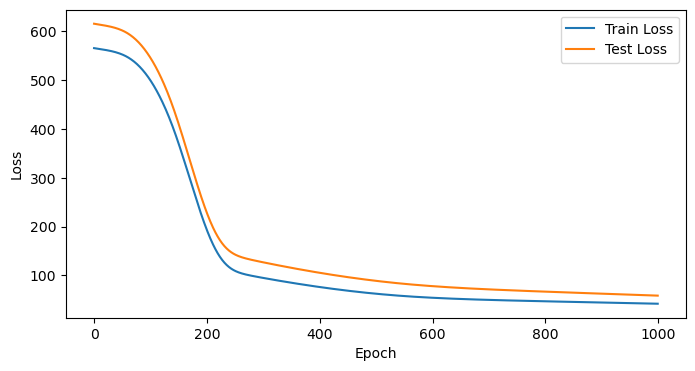

In [40]:
# Plot the loss
plt.figure(figsize = (8, 4))
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

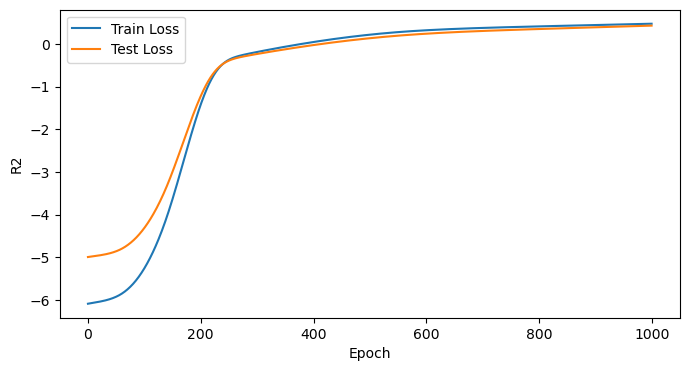

In [41]:
# Plot the loss
plt.figure(figsize = (8, 4))
plt.plot(train_r2, label="Train Loss")
plt.plot(test_r2, label="Test Loss")
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()
plt.show()

## Tensor Flow

In [42]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [43]:
# load data
url = "https://raw.githubusercontent.com/FernandoSartorGH/data/main/housing.csv"
df = pd.read_csv(url)

# Define X and y
X, y = df.drop(columns='target'), df.target

# Train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Standard scaler
scaler = MinMaxScaler().fit(X_train)
train_std = scaler.transform(X_train)
test_std = scaler.transform(X_test)

X_train_std = pd.DataFrame(train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(test_std, columns=X_test.columns)

In [44]:
# Define the model structure
in_size = X_train.shape[1]
hidden_size = 10
out_size = 1

# Create TensorFlow model
tf_model = Sequential([
     Dense(hidden_size, input_shape=(in_size,), activation='relu'),   
     Dense(hidden_size, activation='relu'),                           
     Dense(out_size)                            
])

In [45]:
# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - (SS_res / (SS_tot + tf.keras.backend.epsilon()))

# Compile the model with the custom optimizer and metric
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
tf_model.compile(optimizer=optimizer, loss='mse', metrics=[r_squared])

# Train the model and collect history
history = tf_model.fit(X_train_std, y_train, epochs=1000, batch_size=16, validation_split=0.2, verbose=0)

# Extract training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract training and validation R²
train_r_squared = history.history['r_squared']
val_r_squared = history.history['val_r_squared']

In [46]:
# Evaluate the model on the test set
loss, mae = tf_model.evaluate(X_test_std, y_test)
print(f'Test loss: {loss:.4f}, Test MAE: {mae:.4f}')

# Calculate the R2 score
y_pred = tf_model.predict(X_test_std)
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2:.4f}')

4/4 [==============================] - 0s 3ms/step - loss: 16.9650 - r_squared: 0.8118
Test loss: 16.9650, Test MAE: 0.8118
4/4 [==============================] - 0s 3ms/step
R2 score: 0.8347


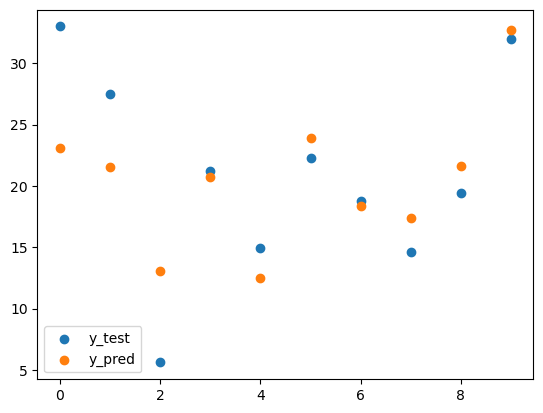

In [47]:
# Plot predictions
data = {'y_test': y_test, 'y_pred':y_pred.reshape(-1)}
data_df = pd.DataFrame(data).reset_index()

data_df_plot = data_df[0:10]

plt.scatter(x=data_df_plot.index, y=data_df_plot.y_test, label='y_test')
plt.scatter(x=data_df_plot.index, y=data_df_plot.y_pred, label='y_pred')
plt.legend()
plt.show()

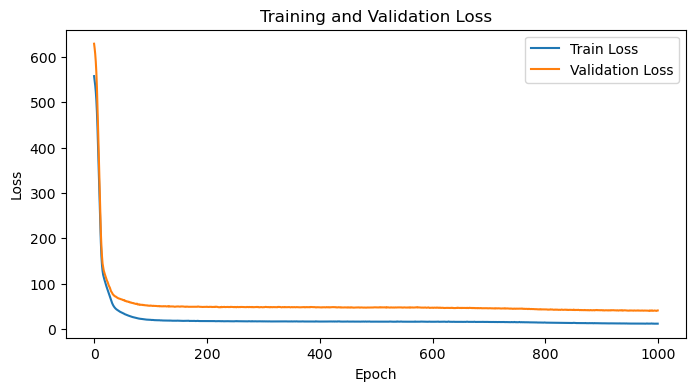

In [48]:
# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss
plt.figure(figsize = (8, 4))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

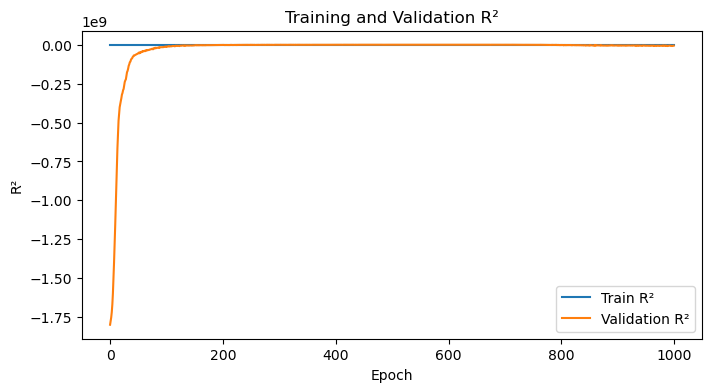

In [49]:
# Extract training and validation R²
train_r2 = history.history['r_squared']
val_r2 = history.history['val_r_squared']

# Plot R²
plt.figure(figsize = (8, 4))
plt.plot(train_r2, label='Train R²')
plt.plot(val_r2, label='Validation R²')
plt.xlabel('Epoch')
plt.ylabel('R²')
plt.title('Training and Validation R²')
plt.legend()
plt.show()

---

# <center>Clustering

Hierarchical clustering requires us to decide on both a distance and linkage method. We will use euclidean distance and the Ward linkage method, which attempts to minimize the variance between clusters.

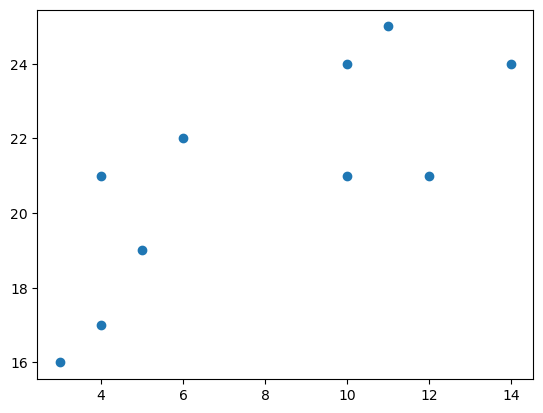

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

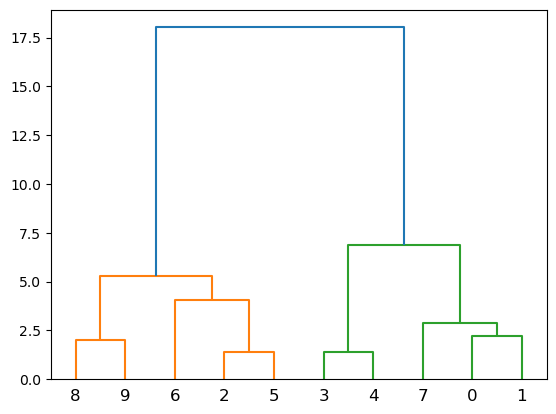

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

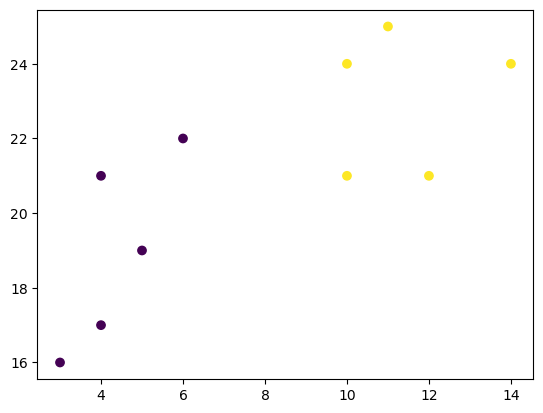

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

---